# Análisis de los datos


El propósito de este cuaderno es llevar a cabo un análisis preliminar de los datos. Se centra en examinar los datos del electroencefalograma (EEG). Esto permite la lectura, procesamiento y visualización de señales de EEG almacenadas en archivos con formato EDF (European Data Format).

In [ ]:
import pyedflib
import numpy as np
import matplotlib.pyplot as plt

Mostramos información relevante del conjunto de datos, así como el número de canales, las etiquetas de los canales, la frecuencia de muestreo y los datos de señal para cada canal, donde se muestra el nombre del canal y sus registros en microvoltios.

In [24]:
# Nombre del archivo EDF
file_name = "../DataSet/S001R08.edf"

# Abrir el archivo EDF
f = pyedflib.EdfReader(file_name)

# Obtener información básica
n_channels = f.signals_in_file
channel_labels = f.getSignalLabels()
# Se asume que todas las señales tienen la misma frecuencia de muestreo
sample_frequency = f.getSampleFrequency(0)

# Leer todas las señales
signals = []
for i in range(n_channels):
    signal = f.readSignal(i)
    signals.append(signal)

# Cerrar el archivo
f.close()

# Mostrar información
print("Número de canales:", n_channels)
print("Etiquetas de los canales:", channel_labels)
print("Frecuencia de muestreo:", sample_frequency)
print("Datos de señal:")
for i, label in enumerate(channel_labels):
    print(f"Canal {i+1} ({label}): {signals[i]}")

Número de canales: 64
Etiquetas de los canales: ['Fc5.', 'Fc3.', 'Fc1.', 'Fcz.', 'Fc2.', 'Fc4.', 'Fc6.', 'C5..', 'C3..', 'C1..', 'Cz..', 'C2..', 'C4..', 'C6..', 'Cp5.', 'Cp3.', 'Cp1.', 'Cpz.', 'Cp2.', 'Cp4.', 'Cp6.', 'Fp1.', 'Fpz.', 'Fp2.', 'Af7.', 'Af3.', 'Afz.', 'Af4.', 'Af8.', 'F7..', 'F5..', 'F3..', 'F1..', 'Fz..', 'F2..', 'F4..', 'F6..', 'F8..', 'Ft7.', 'Ft8.', 'T7..', 'T8..', 'T9..', 'T10.', 'Tp7.', 'Tp8.', 'P7..', 'P5..', 'P3..', 'P1..', 'Pz..', 'P2..', 'P4..', 'P6..', 'P8..', 'Po7.', 'Po3.', 'Poz.', 'Po4.', 'Po8.', 'O1..', 'Oz..', 'O2..', 'Iz..']
Frecuencia de muestreo: 160.0
Datos de señal:
Canal 1 (Fc5.): [-60. -68. -52. ...   0.   0.   0.]
Canal 2 (Fc3.): [-79. -86. -61. ...   0.   0.   0.]
Canal 3 (Fc1.): [ -98. -102.  -69. ...    0.    0.    0.]
Canal 4 (Fcz.): [-71. -77. -45. ...   0.   0.   0.]
Canal 5 (Fc2.): [-106. -105.  -76. ...    0.    0.    0.]
Canal 6 (Fc4.): [-112. -103.  -70. ...    0.    0.    0.]
Canal 7 (Fc6.): [-73. -56. -27. ...   0.   0.   0.]
Canal 8 (C5

In [22]:
# Calcular el número total de muestras
total_samples = len(signals[0])

# Calcular la duración total en segundos
total_time = total_samples / sample_frequency

print("Tiempo total:", total_samples," ",sample_frequency," ",total_time, "segundos")


Tiempo total: 20000   160.0   125.0 segundos


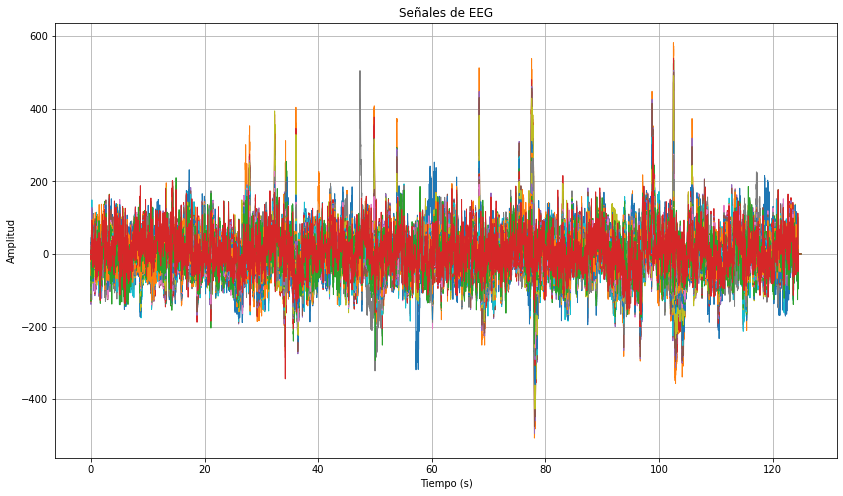

In [25]:
# Crear un arreglo de tiempo en segundos
time = np.arange(len(signals[0])) / sample_frequency

# Crear una figura y ejes para las subgráficas
plt.figure(figsize=(14, 8))
for i in range(n_channels):
    plt.plot(time, signals[i], label=channel_labels[i], linewidth=1)

# Configurar etiquetas y título
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señales de EEG')

# Mostrar la gráfica
plt.grid(True)
plt.show()


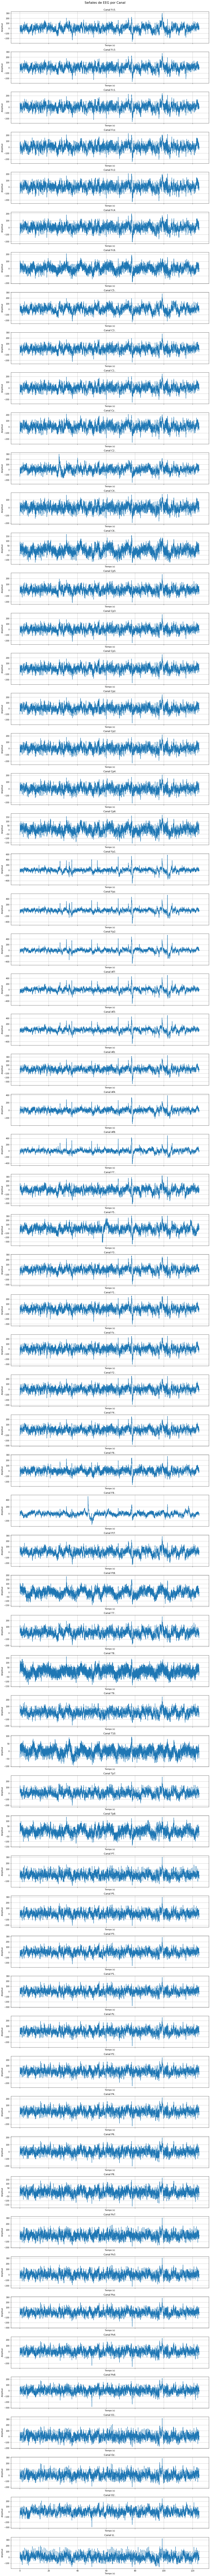

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Crear un arreglo de tiempo en segundos
time = np.arange(len(signals[0])) / sample_frequency

# Crear un espacio entre cada gráfica
fig, axs = plt.subplots(n_channels, 1, figsize=(15, n_channels * 3), sharex=True)

for i in range(n_channels):
    axs[i].plot(time, signals[i], label=f'Canal {channel_labels[i]}')
    axs[i].set_title(f'Canal {channel_labels[i]}')
    axs[i].set_ylabel('Amplitud')
    axs[i].set_xlabel('Tiempo (s)')
    axs[i].grid(True)

plt.suptitle('Señales de EEG por Canal', fontsize=16)
plt.subplots_adjust(hspace=0.5)
# Ajusta el espacio entre el titulo y las gráficas
plt.tight_layout(rect=[0, 0.03, 1, 0.98])

# Mostrar la gráfica
plt.show()
